**Monte Carlo Pricing for Lookback Options**

This notebook implements Monte Carlo simulation for pricing Lookback options, which are path-dependent derivatives whose payoffs depend on the minimum (or maximum) asset price over the option’s life.
We simulate price paths using Geometric Brownian Motion (GBM) and compute expected discounted payoffs, comparing Lookback and Vanilla options to explore the value of path dependency.

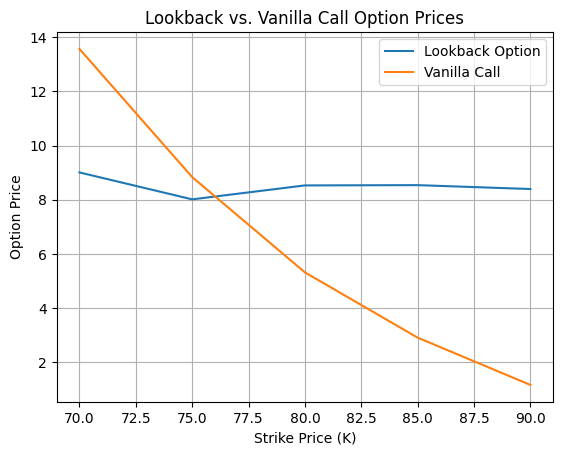

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Monte Carlo Simulation for GBM ---
def mc_sim(S0, sigma, T, r, num_sim, num_steps):
    dt = T / num_steps
    paths = np.zeros((num_sim, num_steps))
    for i in range(num_sim):
        paths[i, 0] = S0
        for j in range(1, num_steps):
            z = np.random.randn()
            paths[i, j] = paths[i, j-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*z)
    return paths

# --- Lookback Option Pricing ---
def lookback_price(S0, sigma, T, r, num_sim, num_steps):
    """Compute Lookback payoff = S(T) - min(S_t)"""
    paths = mc_sim(S0, sigma, T, r, num_sim, num_steps)
    payoffs = [paths[i, -1] - np.min(paths[i]) for i in range(num_sim)]
    return np.mean(payoffs)

# --- Vanilla European Call for Comparison ---
def vanilla_call(S0, K, sigma, T, r, num_sim, num_steps):
    paths = mc_sim(S0, sigma, T, r, num_sim, num_steps)
    payoffs = [np.exp(-r*T)*max(paths[i, -1] - K, 0) for i in range(num_sim)]
    return np.mean(payoffs)

# --- Simulation Parameters ---
S0 = 80
K_values = np.linspace(70, 90, 5)
sigma = 0.1
T = 1
r = 0.05
num_sim = 500
num_steps = 100

# --- Evaluate Lookback and Vanilla Prices ---
lookback_prices = [lookback_price(S0, sigma, T, r, num_sim, num_steps) for _ in K_values]
vanilla_prices = [vanilla_call(S0, K, sigma, T, r, num_sim, num_steps) for K in K_values]

# --- Visualization ---
plt.plot(K_values, lookback_prices, label='Lookback Option')
plt.plot(K_values, vanilla_prices, label='Vanilla Call')
plt.xlabel("Strike Price (K)")
plt.ylabel("Option Price")
plt.title("Lookback vs. Vanilla Call Option Prices")
plt.legend()
plt.grid(True)
plt.show()
